# 📌 Hybrid Recommendation System (Movies & Anime)

## **Unsupervised Clustering & Content-Based Approach**  

This project aims to build a **movie & anime recommendation system** using **unsupervised machine learning (clustering) and content-based filtering**.  


**Key Objectives:**  

- Cluster Netflix movies & anime based on features  
- Use content similarity to recommend relevant titles  
- Explore data to understand key patterns and trends  


### 📖 Notebook Overview  


This notebook focuses on **loading and exploring the dataset** to understand its structure, quality, and key characteristics.  


**What we are doing:**  

✔ Loading Netflix and anime datasets 
✔ Performing an initial inspection (shape, columns, missing values)  
✔ Generating summary statistics and sample data  

**Why we are doing this:**  

Understanding the dataset is crucial before feature engineering and modeling. We need to ensure data consistency and identify potential issues like missing values or incorrect formats.  

**What we expect:**  

By the end of this notebook, we should have:

✔ A clear understanding of dataset structure
✔ Insights into missing or inconsistent data  
✔ A plan for preprocessing steps  


## 🛠 **Importing Libraries & Loading Data**

In [1]:
import sys
import os

In [2]:
# Get absolute path to the project's root directory
project_root = os.path.abspath("..")

# Add project root to sys.path (so src/ and utils/ are accessible)
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [4]:
from utils.config import MOVIES_PATH, ANIME_PATH
from utils.visualization import visualize_chart, plot_functions

from summaries.register_summaries import summary_factory

from src.data_preprocessing.data_analysis import analyze_dataset 
from src.data_preprocessing.create_dataframe import create_dataframe

from src.eda.correlation.analyze_correlation import analyze_correlation_matrix

from src.eda.skewness.analyze_skewness import analyze_skewness

from src.eda.outliers.transformations import best_transformation_with_outliers


In [5]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_column', None)
pd.set_option('display.width', None)

## Data Preprocessing

In [6]:
# Load datasets
movies_df = create_dataframe(MOVIES_PATH)
anime_df = create_dataframe(ANIME_PATH)

### First Look - Movies

In [7]:
result = analyze_dataset(movies_df, exclude_columns=['id'])

In [8]:
print(summary_factory.generate_summary("overview", result))
print("\n" + "="*80 + "\n")
print(summary_factory.generate_summary("observations", result))

The dataset contains 4803 rows and 20 columns.

There are 3941 missing values across 5 columns.
Missing values account for 4.10% of the dataset.
Columns with missing values and their counts:
  - homepage: 3091 missing values
  - overview: 3 missing values
  - release_date: 1 missing values
  - runtime: 2 missing values
  - tagline: 844 missing values

There are no duplicate rows in the dataset.

Data Types:

              Column DataType
              budget    int64
              genres   object
            homepage   object
                  id    int64
            keywords   object
   original_language   object
      original_title   object
            overview   object
          popularity  float64
production_companies   object
production_countries   object
        release_date   object
             revenue    int64
             runtime  float64
    spoken_languages   object
              status   object
             tagline   object
               title   object
        vote_avera

### Handling Missing Values

The dataset contains 4803 rows and 20 columns.

There are 3941 missing values across 5 columns.

  - homepage: 3091 missing values (64.35561107641058% of data is missing)
  - overview: 3 missing values - 
  - release_date: 1 missing values
  - runtime: 2 missing values
  - tagline: 844 missing values

In [9]:
movies_df[movies_df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.00,[],[],NaN,0,0.00,[],Released,NaN,America Is Still the Place,0.00,0


In [10]:
movies_df = movies_df.dropna(subset=['release_date'])

In [11]:
movies_df[movies_df['overview'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.74,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.30,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.05,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.00,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.80,[],[],2014-04-26,0,83.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.40,8


In [12]:
movies_df[movies_df['runtime'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.74,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.30,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.05,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.00,0


In [13]:
# excluding non-numeric and columns that are not needed in descriptive summary function like df.describe(), correlation and skewness etc

exclude_columns = {'id',}

In [14]:
movies_df.drop(columns=['homepage'], inplace=True)

In [15]:
movies_df['tagline'].fillna('no tagline', inplace=True)

In [16]:
movies_df.loc[2656, 'overview'] = "On his path to becoming Pope Francis, Father Jorge Bergoglio pursues his religious vocation in a country ravaged by a brutal military dictatorship."
movies_df.loc[4140, 'overview'] = "An exploration of how singer and actor Frank Sinatra became one of the biggest stars of the 20th century while remaining, in his heart, a normal person."
movies_df.loc[4431, 'overview'] = "In America, farm labor has always been one of the most difficult, poorly paid jobs and has relied on some of the nation's most vulnerable people. While the legal restrictions that keep people bound to farms have been abolished, exploitation still exists. Ranging from wage theft to modern-day slavery, this exploitation is perpetuated by the corporations at the top of the food chain: supermarkets."

In [17]:
movies_df.loc[2656, 'runtime'] = 113
movies_df.loc[4140, 'runtime'] = 81

In [18]:
# Convert release_date to datetime and extract year
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

In [19]:
movies_df['release_year'] = movies_df['release_date'].dt.year

In [20]:

# Convert budget and revenue to millions for better readability
movies_df['budget_million'] = movies_df['budget'] / 1e6
movies_df['revenue_million'] = movies_df['revenue'] / 1e6


In [21]:
def process_list_columns(column):
    return movies_df[column].fillna('[]').apply(lambda x: [item['name'] for item in eval(x)] if isinstance(x, str) and x.startswith('[') else [])

In [22]:
list_columns = ['genres', 'keywords', 'production_companies', 'production_countries']

In [23]:
# for col in list_columns:
#     movies_df[col] = process_list_columns(col)

## Exploratory Data Analysis

In [24]:
filter_column = list(set(movies_df.columns) - exclude_columns)

### Correlation

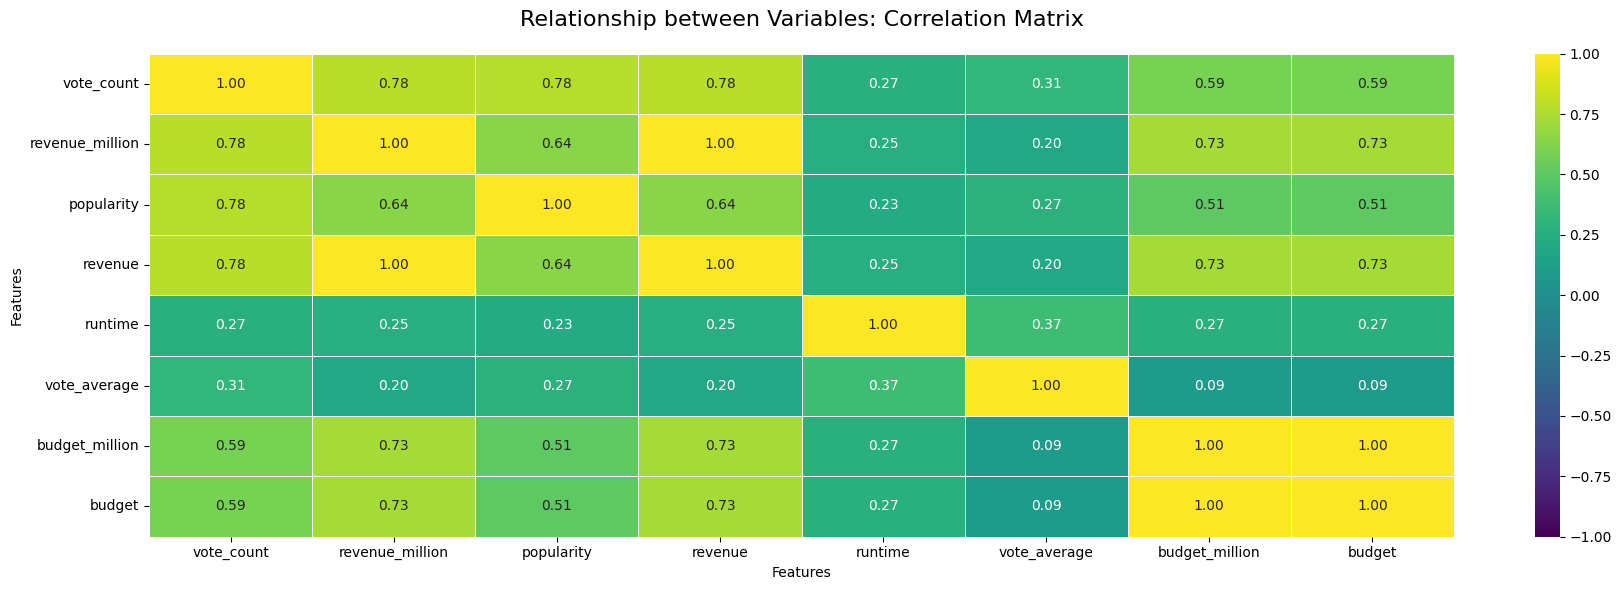

In [25]:
result = analyze_correlation_matrix(movies_df, filter_column)

### Skewness

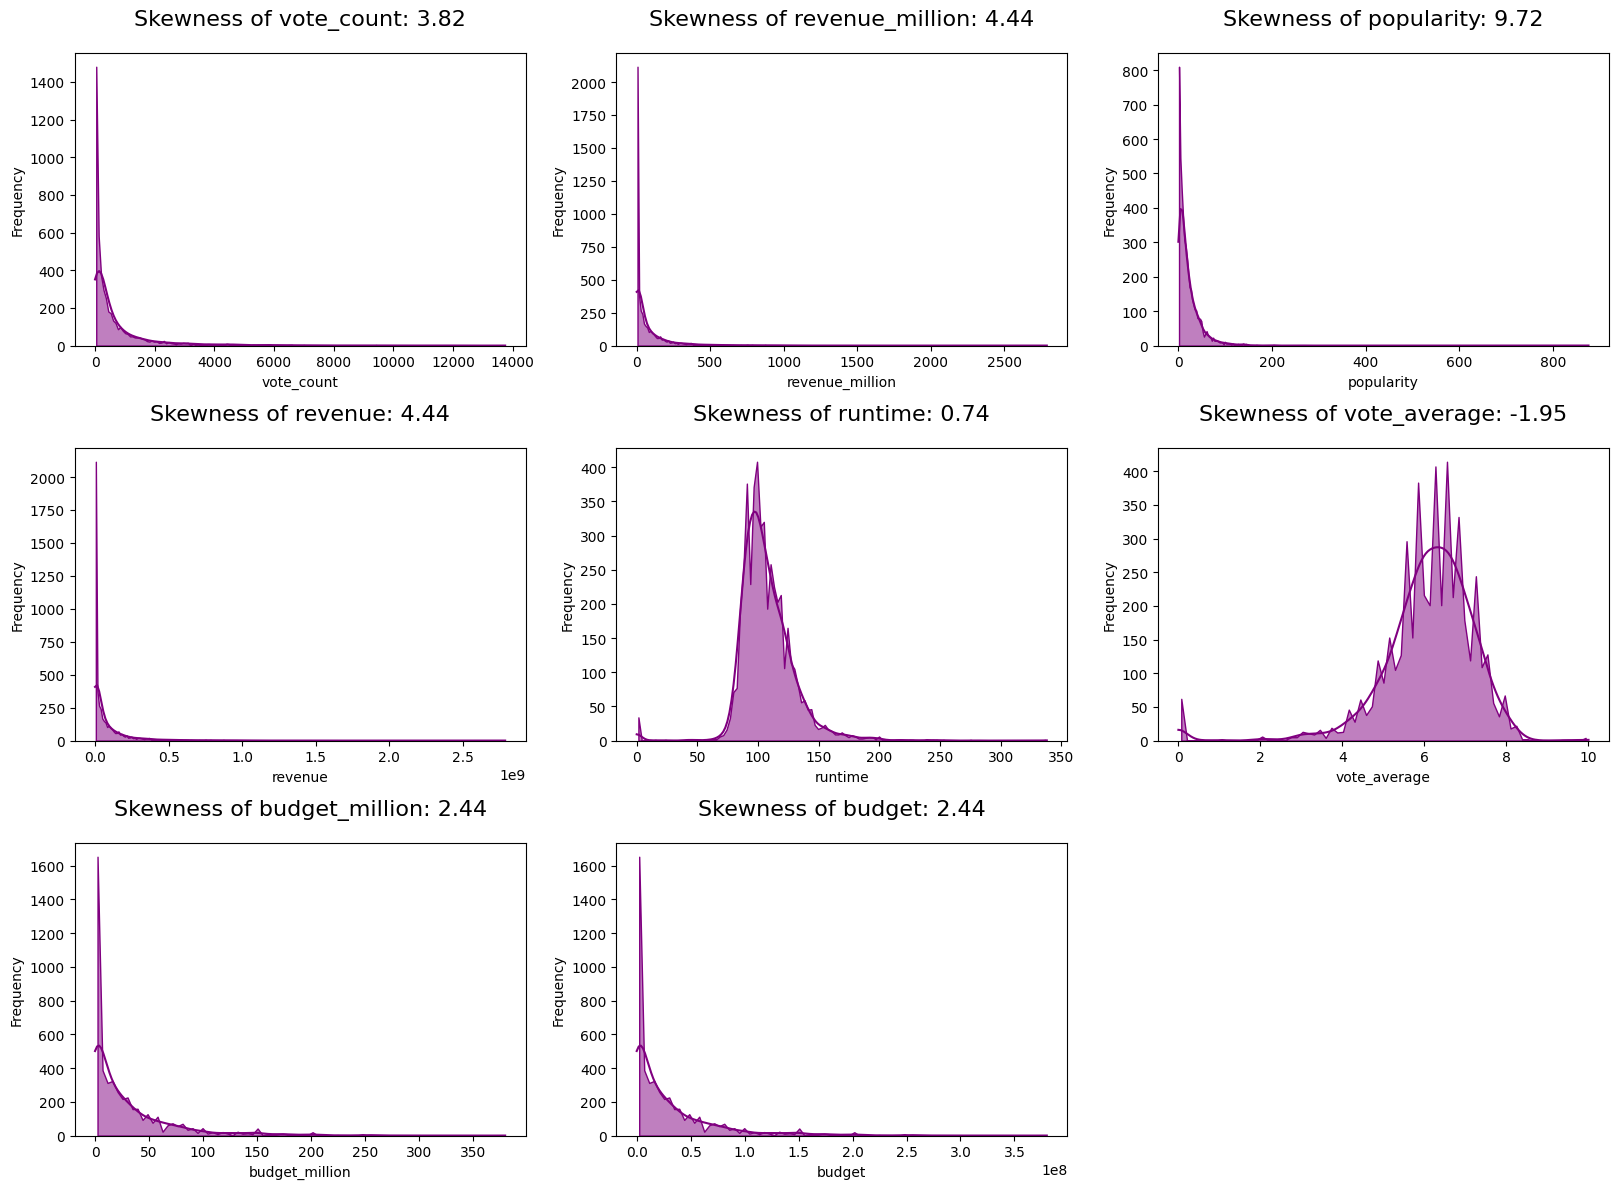

In [26]:
skewness = analyze_skewness(movies_df, filter_column)

In [27]:
print(summary_factory.generate_summary("skewness", skewness))

- Highly skewed columns (suggesting log transformation): vote_count, revenue_million, popularity, revenue, vote_average, budget_million, budget
- Moderately skewed columns (suggesting square root transformation): runtime

Detailed Skewness Values:
         Column  Skewness
     vote_count      3.82
revenue_million      4.44
     popularity      9.72
        revenue      4.44
        runtime      0.74
   vote_average     -1.95
 budget_million      2.44
         budget      2.44


### Outliers

In [28]:
# Chart_objs to create subpots - boxplot for each columns

chart_objs = []
for col in filter_column:
    # print(col, skewness[col])
    if movies_df[col].dtypes in ['int64', 'float64']:
        print(col)
        chart_objs.append({
        'plot_function':plot_functions['box'] ,
        'title': f'Boxplot of {col}',  # Title for each individual column
        'xlabel': col,
        'ylabel': None,
        'x': movies_df[col],
        'kwargs': { 'color': 'purple'}
        })

vote_count
revenue_million
popularity
revenue
runtime
vote_average
budget_million
budget


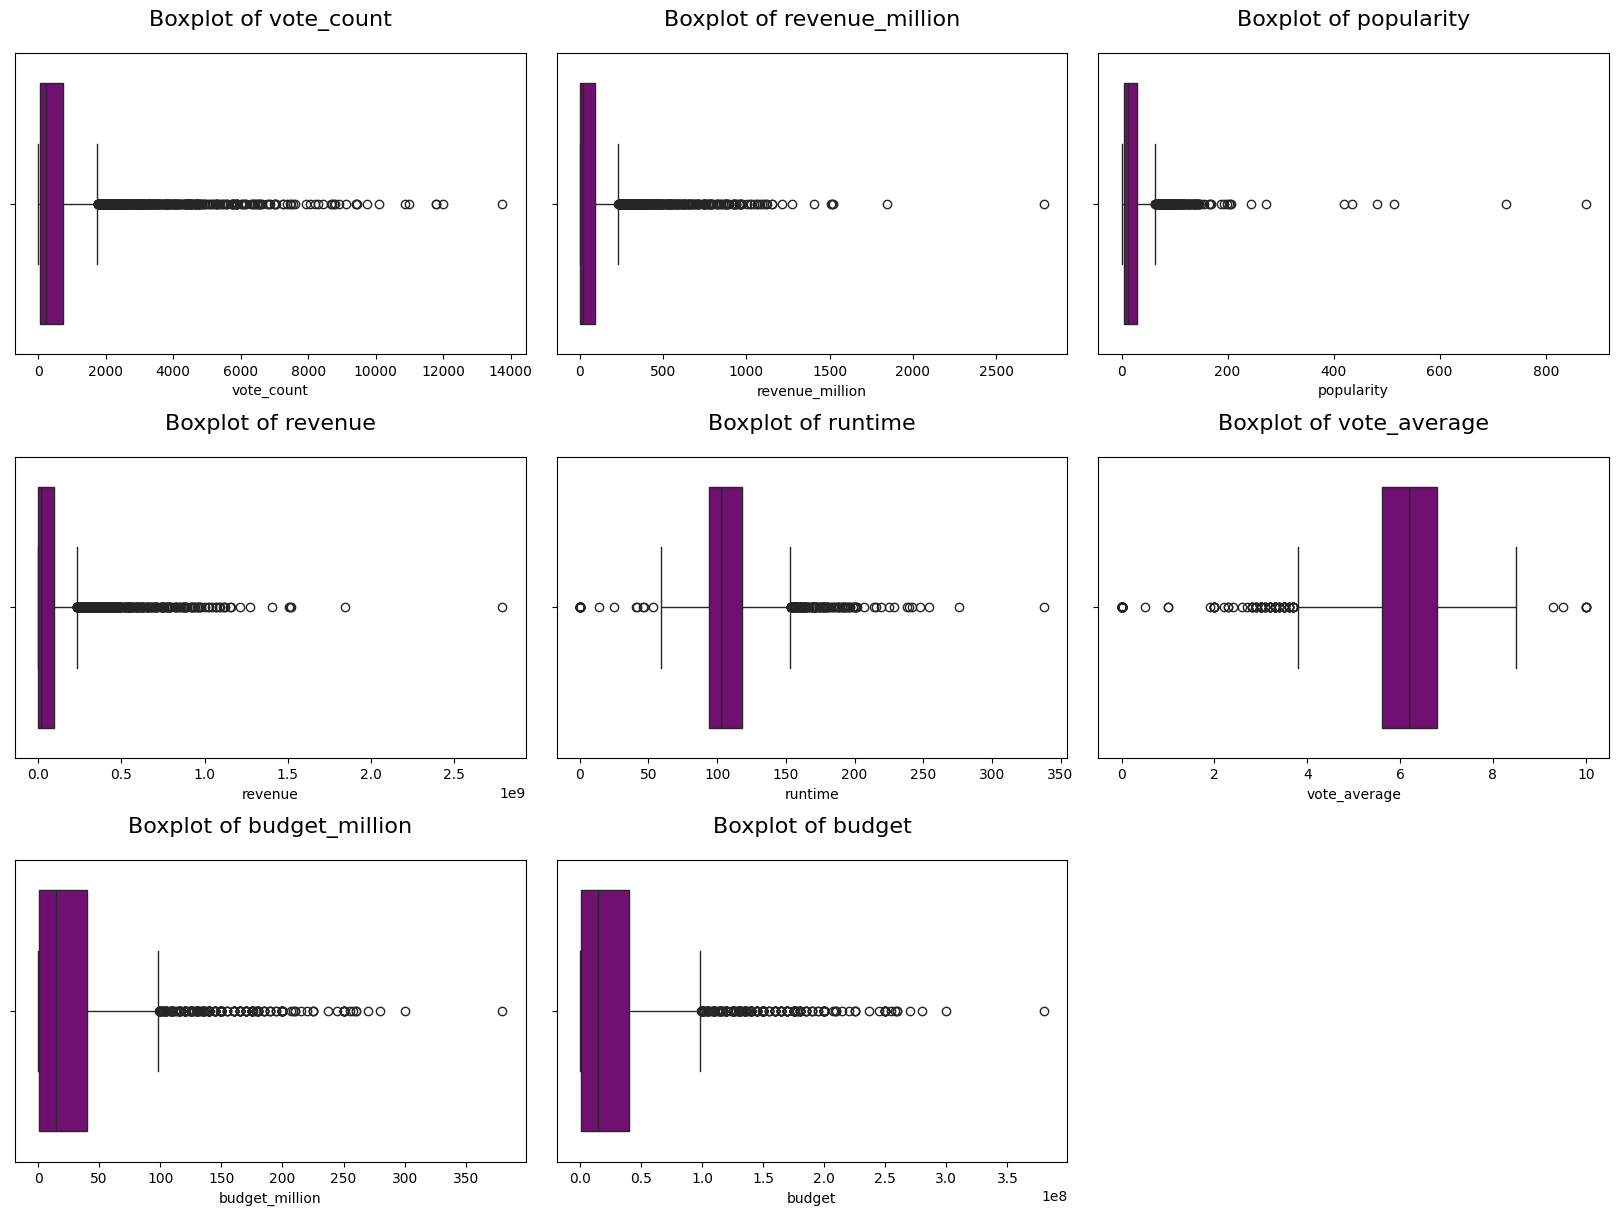

In [29]:
# Fig - Visualizing the box plots for each numeric columns 

visualize_chart(chart_objs, nrows=(len(filter_column) // 3 + 1), ncols=3)
plt.show()

In [30]:
# Transforming data using (log , sqrt) transformations and separating df and outliers in separate dataframe
movies_df1 = best_transformation_with_outliers(movies_df, skewness, handle_outliers=False)

Applying log transformation to vote_count due to high_skew skewness.
Applying log transformation to revenue_million due to high_skew skewness.
Applying log transformation to popularity due to high_skew skewness.
Applying log transformation to revenue due to high_skew skewness.
Applying log transformation to vote_average due to high_skew skewness.
Applying log transformation to budget_million due to high_skew skewness.
Applying log transformation to budget due to high_skew skewness.
Applying sqrt transformation to runtime due to moderate_skew skewness.


In [31]:
movies_df1.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,budget_million,revenue_million
0,19.28,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",5.02,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,21.75,12.73,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,2.10,9.38,2009,5.47,7.93
1,19.52,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",4.94,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,20.68,13.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,2.07,8.41,2007,5.71,6.87
2,19.32,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,4.69,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,20.60,12.17,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,1.99,8.40,2015,5.51,6.78
3,19.34,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,4.73,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,20.80,12.85,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,2.15,9.12,2012,5.53,6.99
4,19.38,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",3.81,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,19.46,11.49,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,1.96,7.66,2012,5.56,5.65


### First Look - Anime

In [32]:
result = analyze_dataset(anime_df, exclude_columns=['anime_id'])

In [33]:
print(summary_factory.generate_summary("overview", result))
print("\n" + "="*80 + "\n")
print(summary_factory.generate_summary("observations", result))

The dataset contains 6668 rows and 33 columns.

There are 25258 missing values across 12 columns.
Missing values account for 11.48% of the dataset.
Columns with missing values and their counts:
  - title_english: 3230 missing values
  - title_japanese: 5 missing values
  - title_synonyms: 2187 missing values
  - image_url: 2 missing values
  - rating: 82 missing values
  - rank: 356 missing values
  - background: 5855 missing values
  - premiered: 3702 missing values
  - broadcast: 3688 missing values
  - producer: 2266 missing values
  - licensor: 3881 missing values
  - genre: 4 missing values

There are no duplicate rows in the dataset.

Data Types:

         Column DataType
       anime_id    int64
          title   object
  title_english   object
 title_japanese   object
 title_synonyms   object
      image_url   object
           type   object
         source   object
       episodes    int64
         status   object
         airing     bool
   aired_string   object
          air

### Handling Missing Values

Columns with missing values and their counts:
  - title_english: 3230 missing values
  - title_japanese: 5 missing values
  - title_synonyms: 2187 missing values
  - image_url: 2 missing values
  - rating: 82 missing values
  - rank: 356 missing values
  - background: 5855 missing values
  - premiered: 3702 missing values
  - broadcast: 3688 missing values
  - producer: 2266 missing values
  - licensor: 3881 missing values
  - genre: 4 missing values

In [34]:
anime_df["image_url"] = anime_df["image_url"].str.replace(
    "https://myanimelist.cdn-dena.com/", "https://myanimelist.net/", regex=False
)

In [35]:
url = anime_df[anime_df['title_japanese'].isna()][['image_url']].iloc[1]
url.image_url

'https://myanimelist.net/images/anime/3/84436.jpg'

In [36]:
# excluding non-numeric and columns that are not needed in descriptive summary function like df.describe(), correlation and skewness etc
exclude_columns = {'anime_id', }

## Exploratory Data Analysis

In [37]:
filter_column = list(set(anime_df.columns) - exclude_columns)

### Correlation

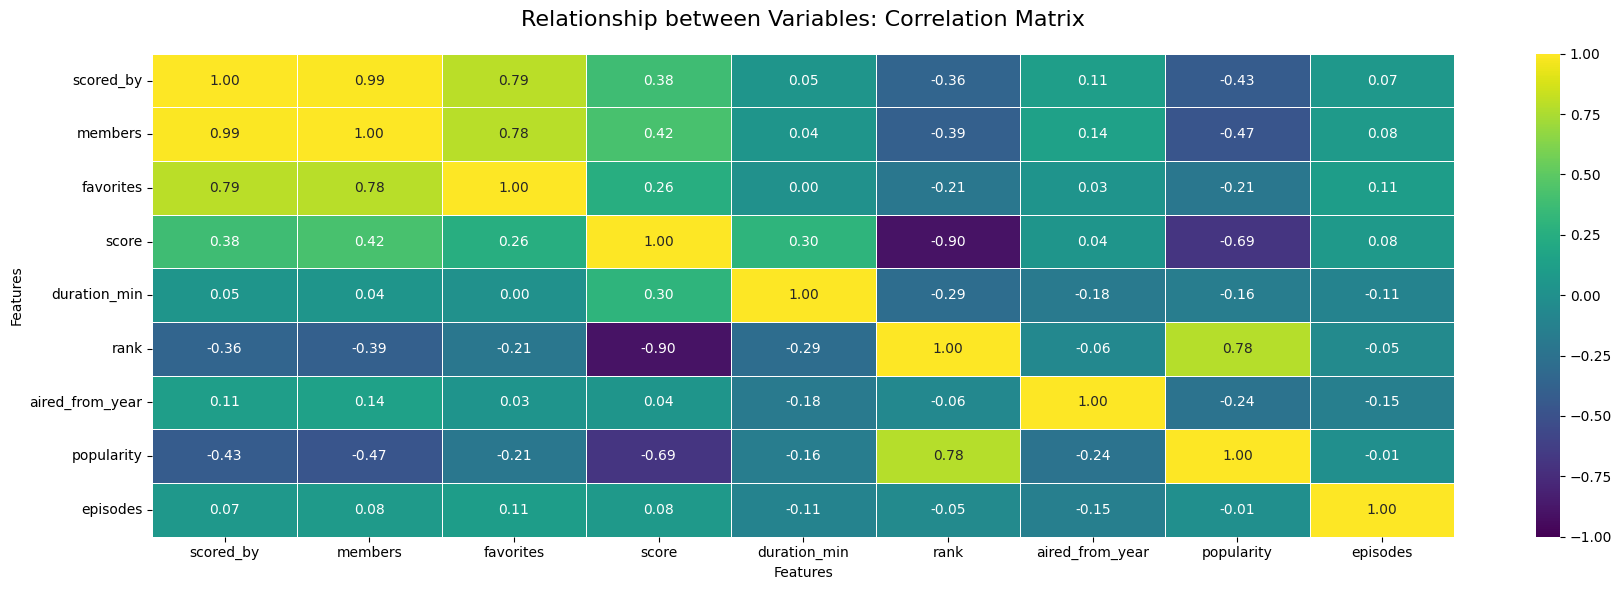

In [38]:
result = analyze_correlation_matrix(anime_df, filter_column)

### Skewness

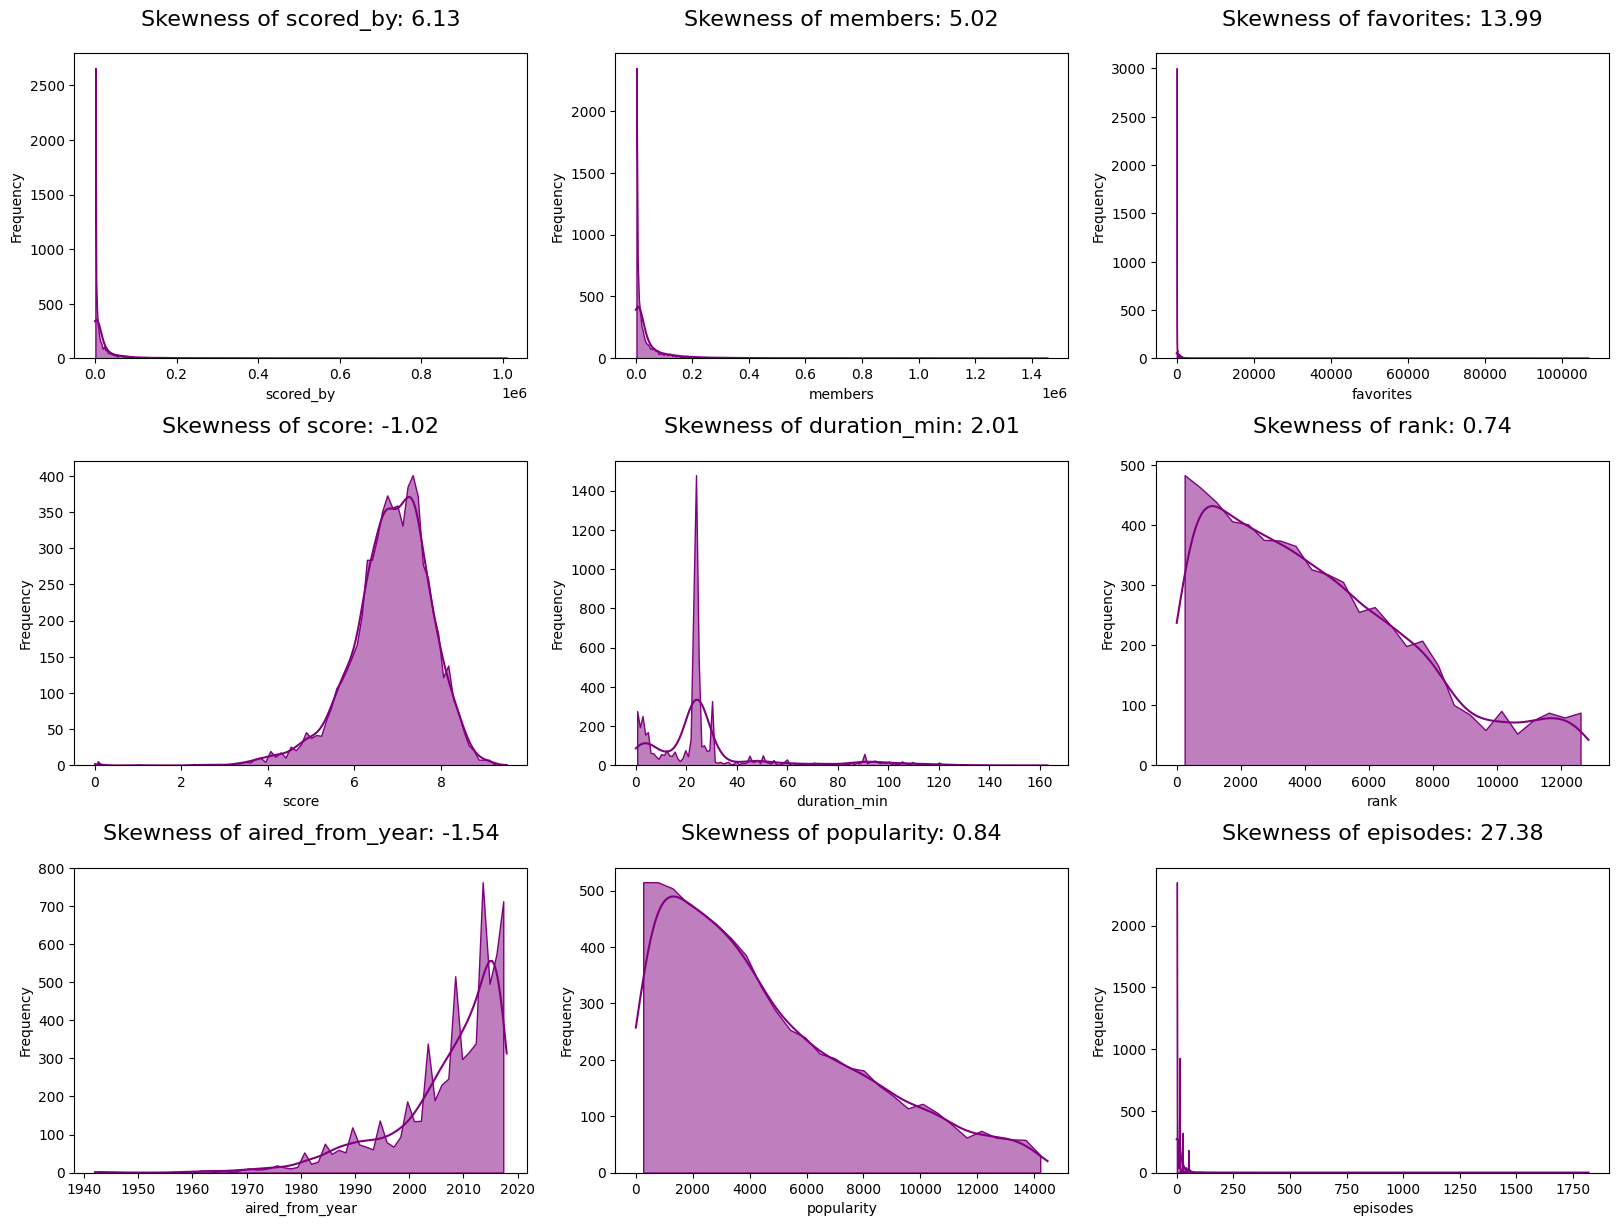

In [39]:
skewness = analyze_skewness(anime_df, filter_column)

In [40]:
print(summary_factory.generate_summary("skewness", skewness))

- Highly skewed columns (suggesting log transformation): scored_by, members, favorites, score, duration_min, aired_from_year, episodes
- Moderately skewed columns (suggesting square root transformation): rank, popularity

Detailed Skewness Values:
         Column  Skewness
      scored_by      6.13
        members      5.02
      favorites     13.99
          score     -1.02
   duration_min      2.01
           rank      0.74
aired_from_year     -1.54
     popularity      0.84
       episodes     27.38


### Outliers

In [41]:
# Chart_objs to create subpots - boxplot for each columns

chart_objs = []
for col in filter_column:
    # print(col, skewness[col])
    if anime_df[col].dtypes in ['int64', 'float64']:
        print(col)
        chart_objs.append({
        'plot_function':plot_functions['box'] ,
        'title': f'Boxplot of {col}',  # Title for each individual column
        'xlabel': col,
        'ylabel': None,
        'x': anime_df[col],
        'kwargs': { 'color': 'purple'}
        })

scored_by
members
favorites
score
duration_min
rank
aired_from_year
popularity
episodes


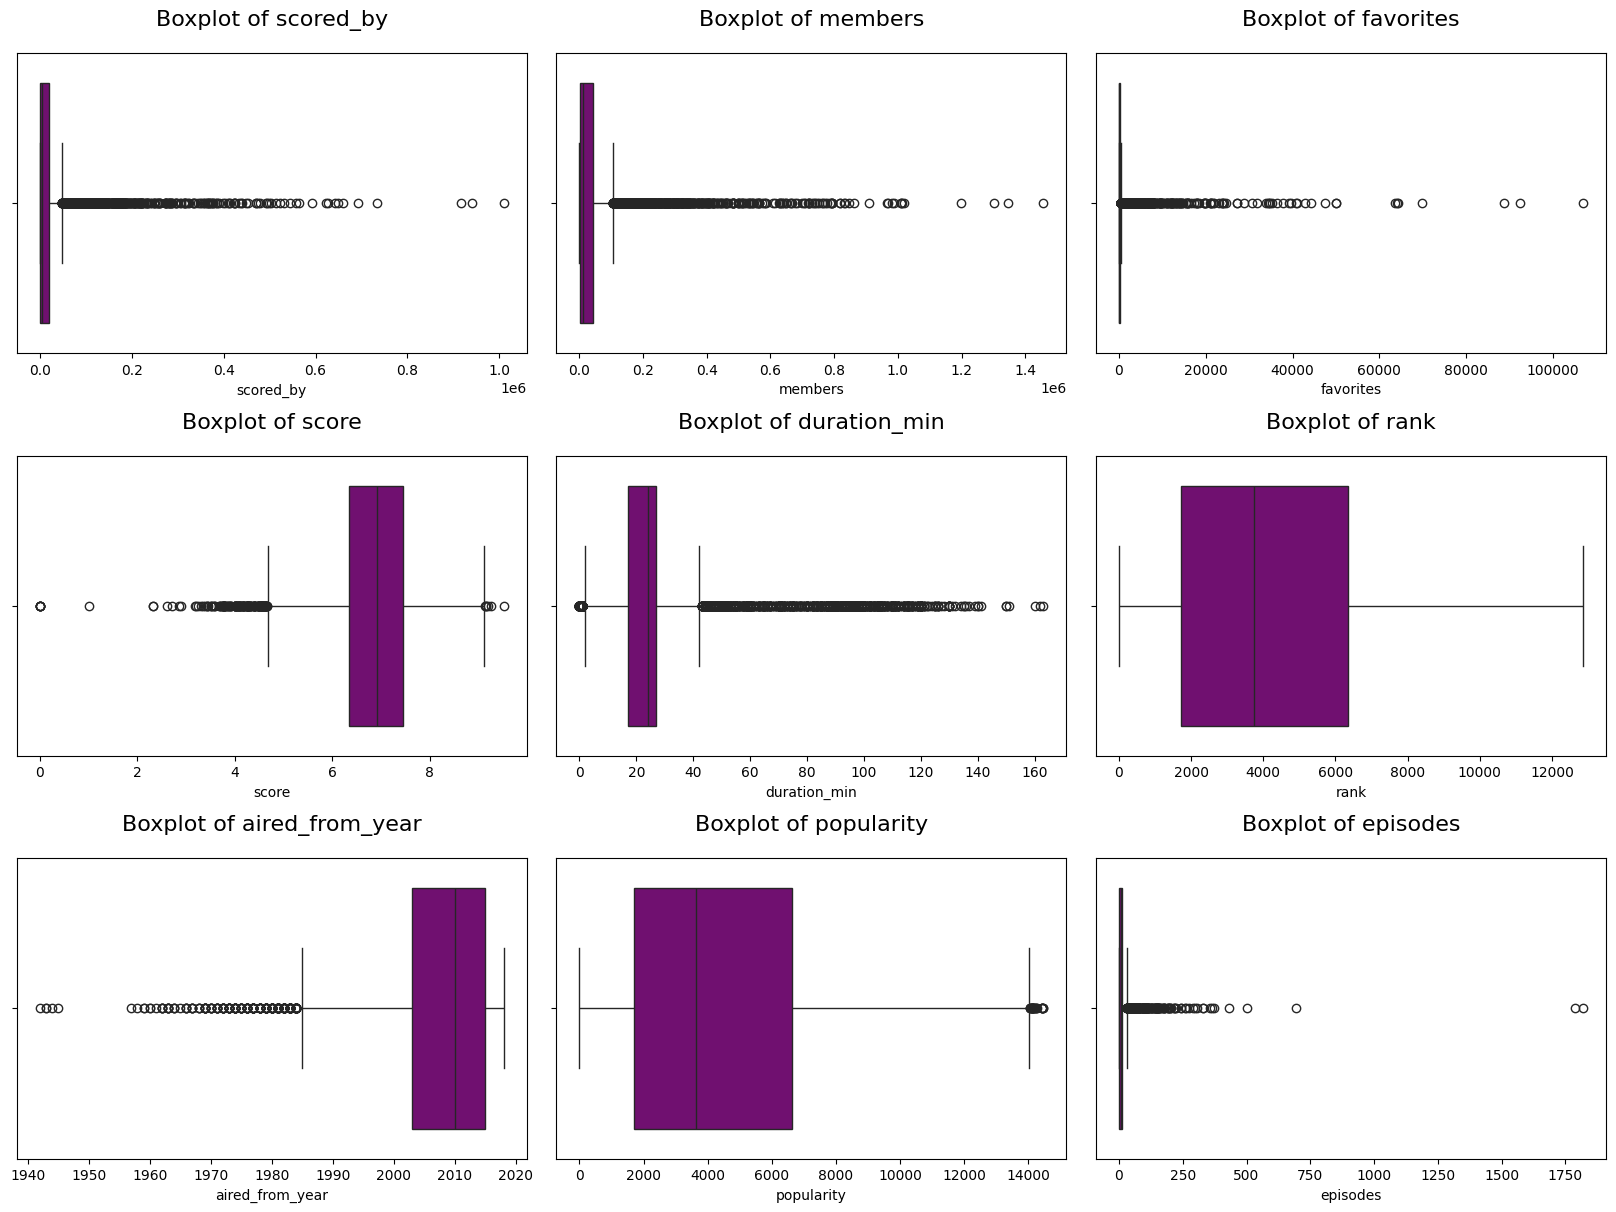

In [42]:
# Fig - Visualizing the box plots for each numeric columns 

visualize_chart(chart_objs, nrows=(len(filter_column) // 3 + 1), ncols=3)
plt.show()

In [43]:
# Rename columns for consistency

anime_df.rename(columns={
    "aired_string": "release_date",
    "aired_from_year": "release_year",
    "type": "status"
}, inplace=True)


In [44]:
# Convert `aired_string` to extract first available date

anime_df["release_date"] = anime_df["release_date"].str.split("to").str[0].str.strip()


In [45]:
# Convert episodes to approximate runtime (assuming avg 24 min per episode)
anime_df["runtime"] = np.where(
    anime_df["episodes"].notna(),
    anime_df["episodes"] * anime_df["duration_min"],
    anime_df["duration_min"]
)

In [46]:
# Standardize genre, studio, and producer
def clean_text_column(column):
    return anime_df[column].fillna("unknown").str.lower().str.replace(", ", "|")


In [47]:
for col in ["genre", "studio", "producer", "licensor"]:
    anime_df[col] = clean_text_column(col)



In [48]:
scaler = MinMaxScaler()
anime_df[["popularity", "score"]] = scaler.fit_transform(
    anime_df[["popularity", "score"]]
)

In [49]:
# Drop unnecessary columns
anime_df.drop(columns=["opening_theme", "ending_theme", "background", "related"], inplace=True)

In [50]:
# Save the cleaned dataset
anime_df.to_csv("../data/anime_cleaned.csv", index=False)